In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [5]:
import xlrd

data= pd.read_excel(r"C:\Users\Rithika\Desktop\book3.xlsx")


In [6]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.shape

(1338, 7)

In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


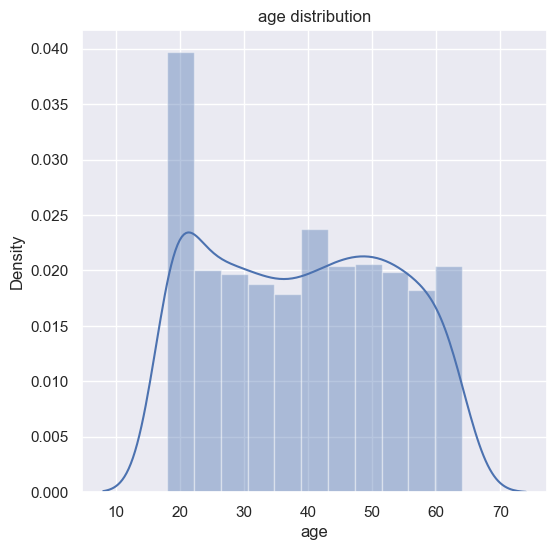

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('age distribution')
plt.show()

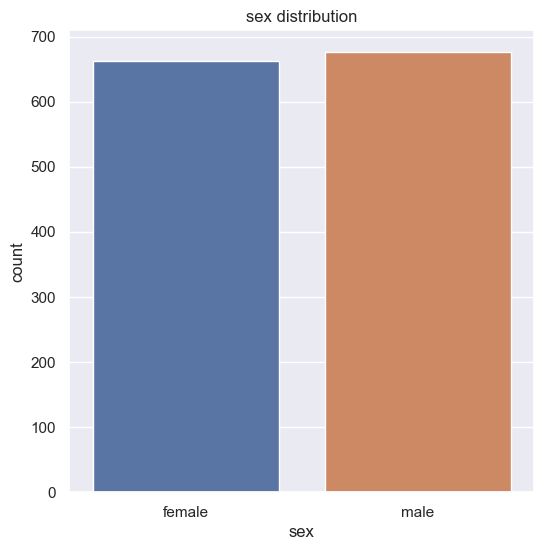

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=data)
plt.title('sex distribution')
plt.show()

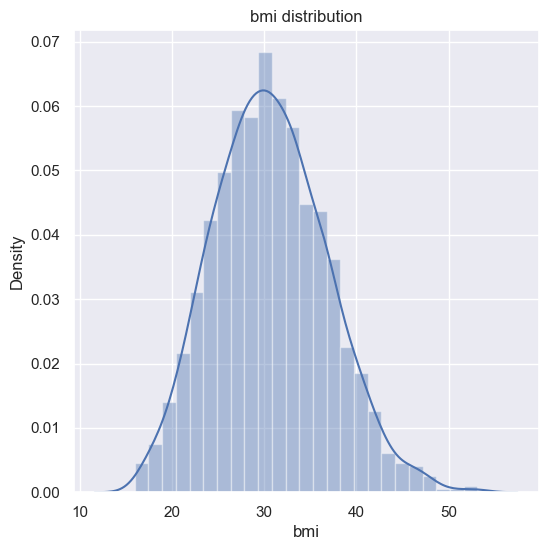

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('bmi distribution')
plt.show()


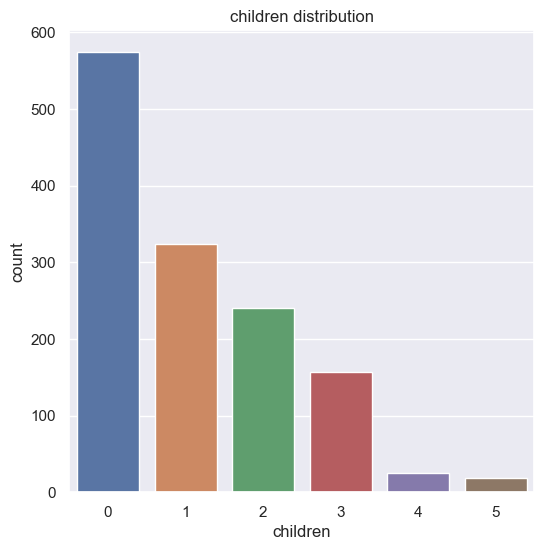

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=data)
plt.title('children distribution')
plt.show()

In [19]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

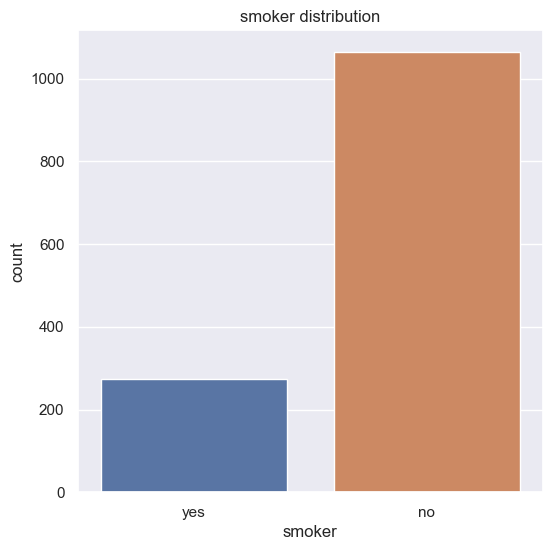

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=data)
plt.title('smoker distribution')
plt.show()

In [23]:
data.replace({'sex':{"male":0,'female':1}}, inplace=True)
data.replace({'smoker':{"yes":0,'no':1}}, inplace=True)
data.replace({'region':{"southeast":0,'southwest':1,'northest':2,'northwest':3}})

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,northeast,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [24]:
x=data.drop(columns='charges', axis=1)
y=data['charges']
print(x)

      age  sex     bmi  children  smoker     region
0      19    1  27.900         0       0  southwest
1      18    0  33.770         1       1  southeast
2      28    0  33.000         3       1  southeast
3      33    0  22.705         0       1  northwest
4      32    0  28.880         0       1  northwest
...   ...  ...     ...       ...     ...        ...
1333   50    0  30.970         3       1  northwest
1334   18    1  31.920         0       1  northeast
1335   18    1  36.850         0       1  southeast
1336   21    1  25.800         0       1  southwest
1337   61    1  29.070         0       0  northwest

[1338 rows x 6 columns]


In [25]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
